### Housing - EDA and Linear Regression

In [22]:
import pandas as pd

#### Load the dataset

In [24]:
file_path = "/Users/mehekkumar/Desktop/MBA/ADV. PROG/homes.csv" 
df = pd.read_csv(file_path)

df.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


The dataset consists of housing market data, with each row representing a different house and various attributes describing its characteristics. Selling and Listing Price are in ($1000s). The size of the living area (in 100s of square feet).

The Sell price is the dependent variable (target) we aim to predict.
Independent variables include factors like List price, Living area, Number of rooms, and Taxes, which may influence the selling price.
The dataset includes a mix of continuous variables (e.g., Acres, Living area, Taxes) and discrete variables (e.g., Beds, Baths, Rooms).
Some variables, such as List price and Sell price, are expected to be highly correlated.


#### Describe the dataset ####

In [26]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sell       50 non-null     int64  
 1    "List"    50 non-null     int64  
 2    "Living"  50 non-null     int64  
 3    "Rooms"   50 non-null     int64  
 4    "Beds"    50 non-null     int64  
 5    "Baths"   50 non-null     int64  
 6    "Age"     50 non-null     int64  
 7    "Acres"   50 non-null     float64
 8    "Taxes"   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


The dataset contains 50 rows and 9 columns. The dataset contains no missing values, as all 50 entries are non-null for each variable.

Observations: 
- Price Range: The selling price varies widely, from $87,000 to $567,000, while the listing price ranges from $90,000 to $625,000.
- House Size: The living area spans from 1,000 sq. ft. (10 x 100) to 6,400 sq. ft. (64 x 100).
- Lot Size: Houses sit on lots ranging from 0.22 acres to 6.49 acres.
- House Age: The oldest house in the dataset is 202 years old, while the youngest is just 2 years old.
- Property Taxes: Property taxes vary significantly, from $1,445 to $12,192 annually.
- Selling price (Sell) and listing price (List) are likely highly correlated, as homes generally sell close to their listing price.
- There may be outliers, especially in taxes, house age, and selling price, given the large range in values.

#### EDA Techniques

##### 1.Distribution Analysis of Numerical Variables

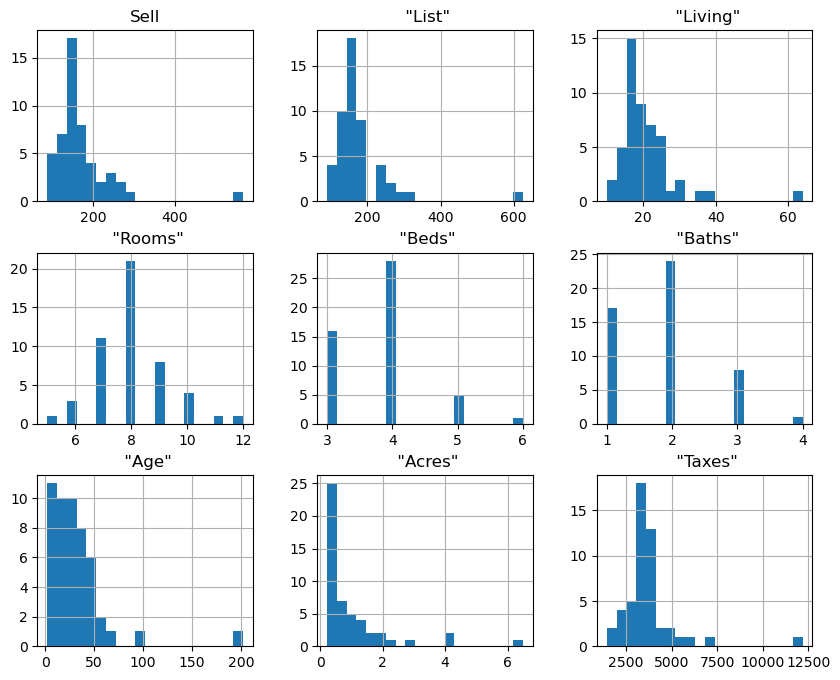

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for key variables
df.hist(figsize=(10, 8), bins=20)
plt.show()

We plot histograms for each numerical column to analyze the distribution of data so that it helps us understand the spread and skewness of the variables and identifies possible outliers and whether transformations are needed.

Observations: 
- Sell and List prices are right-skewed, meaning a few houses have significantly higher prices.
- Living area and Number of Rooms appear normally distributed.
- Taxes and Acres have high skewness, suggesting some extreme values.
- Most houses are less than 50 years old, but some homes are over 200 years old, which is unusual but possible.

##### 2.Correlation of Heatmap

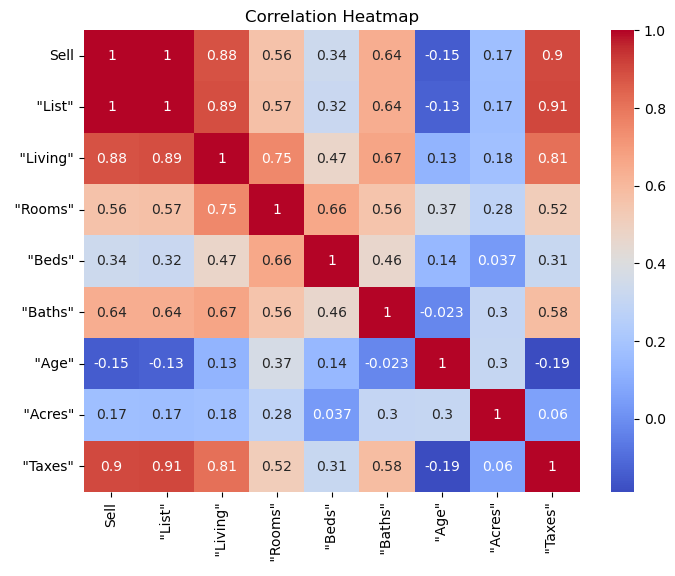

In [30]:
corr_matrix = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

This will help us find relationships between different variables.

Observations
- Sell price is highly correlated with List price (1), indicating homes sell close to their listed price.
- Living area (0.88) has a strong positive correlation with Sell price, suggesting larger homes generally sell for more.
- Taxes (0.90) also correlate strongly with Sell price, meaning higher-taxed properties tend to be more expensive.
- Rooms (0.56) and Baths (0.64) have moderate correlations with Sell price, indicating more rooms and bathrooms slightly increase home value.
- Age has a weak negative correlation (-0.15) with Sell price, implying older homes may sell for slightly less but with low significance.
- Acres has almost no correlation (0.17) with Sell price, meaning lot size does not strongly impact selling price.

##### 3. Scatter Plot: Taxes vs. Sell Price

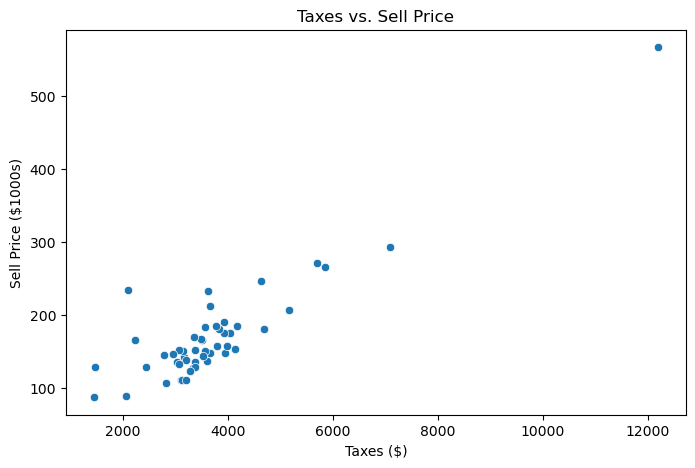

In [32]:
df.columns = df.columns.str.replace('"', '').str.strip()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Taxes"], y=df["Sell"])
plt.xlabel("Taxes ($)")
plt.ylabel("Sell Price ($1000s)")
plt.title("Taxes vs. Sell Price")
plt.show()


We are doing this to determine if there is a linear relationship between property taxes and selling price, to check if higher taxes generally correlate with higher home prices and to identify any outliers that may affect our regression model.

Observations: 
- There is a positive trend, meaning homes with higher taxes tend to have higher selling prices.
- However, the spread is wide, indicating that Taxes alone may not be a strong predictor of Sell price.
- There is a clear outlier in the top-right corner, which might affect regression results.

#### Linear Regression Model with Taxes as Independent Variable & Sell as Dependent Variable

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df[['Taxes']]
y = df['Sell']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model performance
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Coefficients: [0.0408993]
Intercept: 22.854338363987353
R-squared: -0.31345448569316803
Mean Squared Error: 751.2434276370644


Taxes is not a good predictor for Sell price. The negative R² value (-0.31) tells us that the model does not explain the variance in home prices well. 

Some reasons why Taxes alone fails as a strong predictor include:
- Other factors (e.g., Living area, List price, Rooms) may be more influential in determining home prices.
- The relationship is not strictly linear, meaning taxes alone cannot accurately predict the selling price.
- Presence of outliers in the data, as seen in our scatter plot, may distort the model.


##### Regression Model with Living Room as Independent Variable

In [36]:
# Define independent and dependent variables
X_living = df[['Living']]  # Using Living area as the predictor
y = df['Sell']             # Sell price as the dependent variable

# Split the dataset into training and test sets (80% train, 20% test)
X_train_l, X_test_l, y_train, y_test = train_test_split(X_living, y, test_size=0.2, random_state=42)

# Train the linear regression model using Living Area
model_living = LinearRegression()
model_living.fit(X_train_l, y_train)

# Predictions
y_pred_living = model_living.predict(X_test_l)

# Compute model performance metrics
r2_living = r2_score(y_test, y_pred_living)
mse_living = mean_squared_error(y_test, y_pred_living)
coef_living = model_living.coef_[0]
intercept_living = model_living.intercept_

# Print the results
print("### Linear Regression Model: Living Area as Predictor ###")
print(f"Coefficient (Slope): {coef_living}")
print(f"Intercept: {intercept_living}")
print(f"R-squared: {r2_living}")
print(f"Mean Squared Error: {mse_living}")

### Linear Regression Model: Living Area as Predictor ###
Coefficient (Slope): 7.8067397806580265
Intercept: 5.425882352941159
R-squared: -0.46415796521627617
Mean Squared Error: 837.4397897851013


The model using Taxes performed slightly better since its R² (-0.313) is less negative than that of Living Area (-0.464).
However, both models are poor predictors of Sell price, as their R² values indicate that neither model explains much of the variation in home prices.

Limitations: 
- Single Variable Limitation: A multiple linear regression model incorporating additional features would likely perform better.
- As seen in the scatter plot, there may be outliers (extremely large or small homes) distorting the regression model.
- The negative R² means the model is worse than just predicting the mean of the Sell price.
- High MSE indicates poor prediction accuracy.